In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib . pyplot as plt
from skimage import io
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_spd_matrix

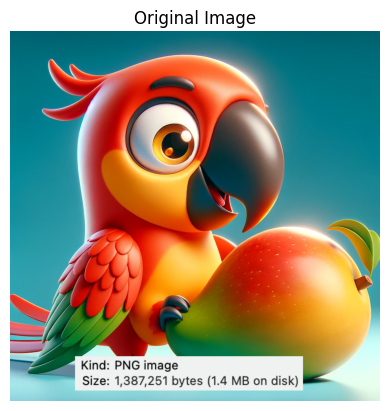

In [3]:
# Ex 3.1

image_path = "/content/drive/MyDrive/Chalmers/SSY316/Assignment6/Macaw.webp"
image = io.imread(image_path)

plt.imshow (image)
plt.title ("Original Image")
plt.axis ("off")
plt.show ()

print(f"Image shape: {image.shape}")
print(f"Image data type: {image.dtype}")

Image shape: (1024, 1024, 3)
Image data type: uint8


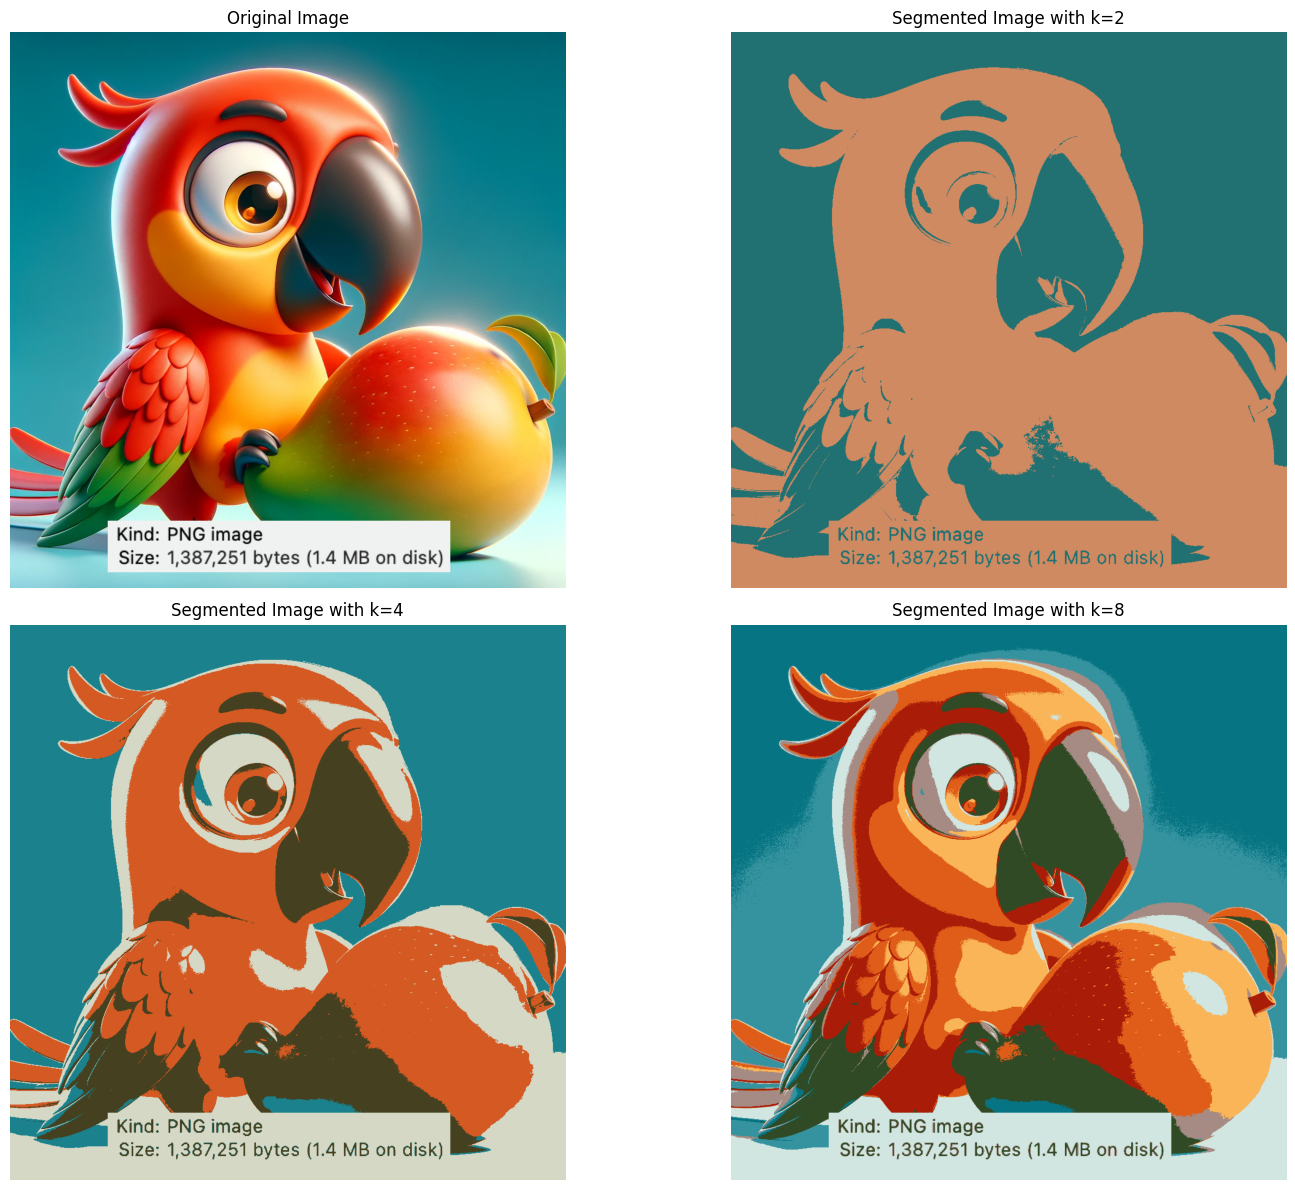

In [4]:
# Ex 3.2

height, width, channels = image.shape

# Flatten the image to a 2D array of pixels
pixels = image.reshape(-1, 3)

# Normalize pixel values to [0, 1]
pixels_normalized = pixels / 255.0

def segment_image(pixels, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixels)
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_

    # Replace each pixel with its cluster centroid
    segmented_pixels = cluster_centers[labels]

    # Rescale to [0, 255] and convert to uint8
    segmented_pixels = (segmented_pixels * 255).astype(np.uint8)

    # Reshape back to the original image shape
    segmented_image = segmented_pixels.reshape(height, width, 3)

    return segmented_image

k_values = [2, 4, 8]

segmented_images = {}

for k in k_values:
    segmented_img = segment_image(pixels_normalized, k)
    segmented_images[k] = segmented_img

plt.figure(figsize=(16, 12))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

# Segmented Images
for i, k in enumerate(k_values, start=2):
    plt.subplot(2, 2, i)
    plt.imshow(segmented_images[k])
    plt.title(f"Segmented Image with k={k}")
    plt.axis("off")

plt.tight_layout()
plt.show()